## Extracting the data and converting to tensors

libraries

In [1]:
from keras.preprocessing import image                  
from sklearn.datasets import load_files
import numpy as np
from keras.utils import np_utils
from glob import glob
from PIL import ImageFile                 
from sklearn.model_selection import train_test_split  
ImageFile.LOAD_TRUNCATED_IMAGES = True 
import pandas as pd
import matplotlib.pyplot as plt
import cv2

Using TensorFlow backend.
/home/aind2/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(256, 256))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in img_paths]
    return np.vstack(list_of_tensors)

def load_dataset(path):
    data = load_files(path)
    image_files = np.array(data['filenames'])
    image_targets = np_utils.to_categorical(np.array(data['target']), 2)
    return image_files, image_targets

targets = [item[13:-1] for item in glob("data/malawi/train/*/")]
malawi_bulk_files, malawi_bulk_targets = load_dataset('data/malawi/train')
malawi_valid_files, malawi_valid_targets = load_dataset('data/malawi/valid')
malawi_train_files, malawi_test_files, malawi_train_targets, malawi_test_targets = train_test_split(malawi_bulk_files,
                                                                                                    malawi_bulk_targets,
                                                                                                    test_size=0.2,
                                                                                                    random_state=1987)

print('There are %s total Malawi map images.\n' % len(np.hstack([malawi_train_files, malawi_valid_files, malawi_test_files])))
print('There are %d training Malawi map images.' % len(malawi_train_files))
print('There are %d validation Malawi map images.' % len(malawi_valid_files))
print('There are %d test Malawi map images.'% len(malawi_test_files))
print('There are %d total map classifications.'% len(targets))

malawi_train_tensors = paths_to_tensor(malawi_train_files).astype('float32')/255
malawi_valid_tensors = paths_to_tensor(malawi_valid_files).astype('float32')/255
malawi_test_tensors = paths_to_tensor(malawi_test_files).astype('float32')/255

There are 9000 total Malawi map images.

There are 6400 training Malawi map images.
There are 1000 validation Malawi map images.
There are 1600 test Malawi map images.
There are 2 total map classifications.


In [3]:
# target stats
target_labels = pd.DataFrame({"built":[1,0],"empty":[0,1]})

def get_label(row):
    for i in target_labels.columns:
        if row[i]==1:
            return i
 
train_df = pd.DataFrame(malawi_train_targets, columns= ('built','empty'))
train_target_df = train_df.apply(get_label, axis=1)
valid_df = pd.DataFrame(malawi_valid_targets, columns= ('built','empty'))
valid_target_df = valid_df.apply(get_label, axis=1)
test_df = pd.DataFrame(malawi_test_targets, columns= ('built','empty'))
test_target_df = test_df.apply(get_label, axis=1)

train_count = np.unique(train_target_df, return_counts=True)
valid_count = np.unique(valid_target_df, return_counts=True)
test_count = np.unique(test_target_df, return_counts=True)

print('There are %s "built" and %s "empty" images in the train set.' % (train_count[1][0], train_count[1][1]))
print('There are %s "built" and %s "empty" images in the valid set.' % (valid_count[1][0], valid_count[1][1]))
print('There are %s "built" and %s "empty" images in the test set.' % (test_count[1][0], test_count[1][1]))

There are 3212 "built" and 3188 "empty" images in the train set.
There are 500 "built" and 500 "empty" images in the valid set.
There are 788 "built" and 812 "empty" images in the test set.


In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(objects))
performance = [10,8,6,4,2,1]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')
 
plt.show()



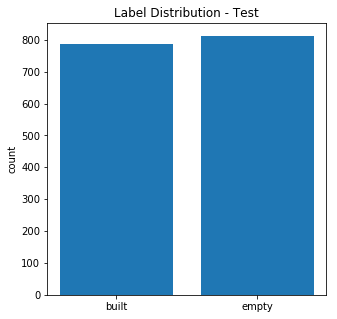

In [44]:
plt.figure(figsize=(5,5)) 
df = pd.DataFrame(malawi_test_targets, columns=('built','empty'))
names = ('built','empty')
built_count = df['built'].sum()
empty_count = df['empty'].sum()

plt.bar(np.arange(len(names)), [built_count, empty_count])
plt.ylabel('count')
plt.xticks(np.arange(len(names)), names)
plt.title('Label Distribution - Test')

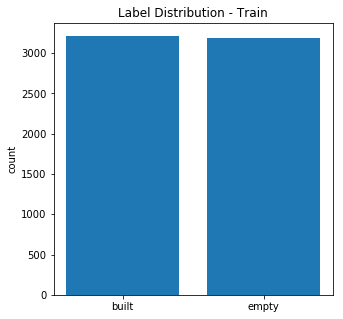

In [45]:
plt.figure(figsize=(5,5)) 
df = pd.DataFrame(malawi_train_targets, columns=('built','empty'))
names = ('built','empty')
built_count = df['built'].sum()
empty_count = df['empty'].sum()

plt.bar(np.arange(len(names)), [built_count, empty_count])
plt.ylabel('count')
plt.xticks(np.arange(len(names)), names)
plt.title('Label Distribution - Train')

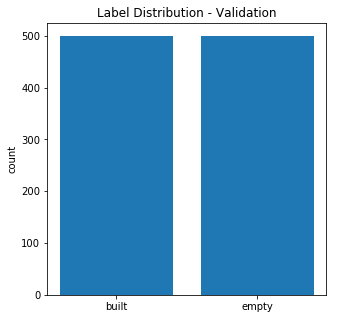

In [46]:
plt.figure(figsize=(5,5)) 
df = pd.DataFrame(malawi_valid_targets, columns=('built','empty'))
names = ('built','empty')
built_count = df['built'].sum()
empty_count = df['empty'].sum()

plt.bar(np.arange(len(names)), [built_count, empty_count])
plt.ylabel('count')
plt.xticks(np.arange(len(names)), names)
plt.title('Label Distribution - Validation')

## Bad_Imagery

In [4]:
from PIL import Image
import glob
bad_imagery = []
for filename in glob.glob('data/bad_imagery/*.jpg'):
    im=Image.open(filename)
    bad_imagery.append(im)

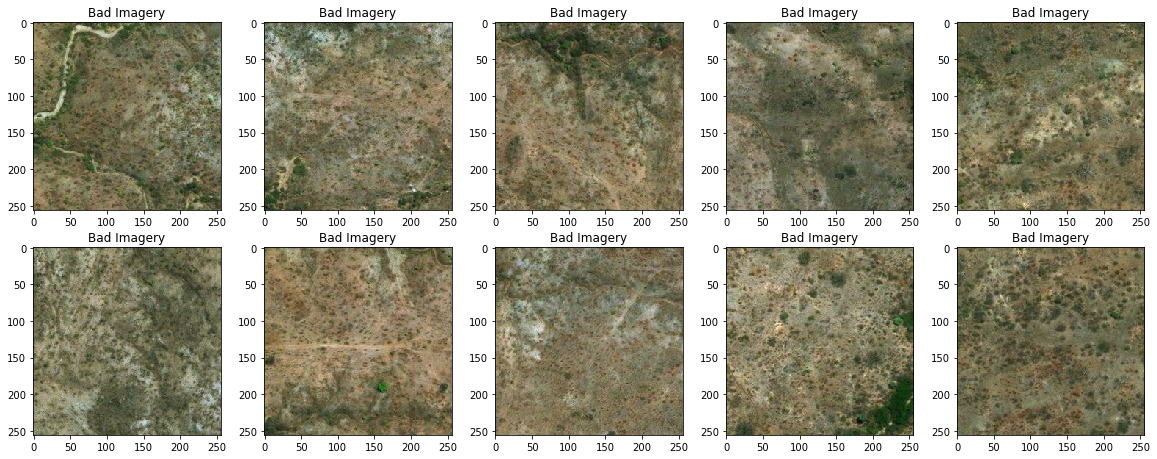

In [5]:
plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.title('Bad Imagery')
    plt.imshow(bad_imagery[i])

## Exploring our images

In [60]:
y = pd.DataFrame(malawi_train_targets)
y = pd.Series(y[0])
pos_y = y[y==1]
built = pos_y.index
neg_y = y[y==0]
empty = neg_y.index

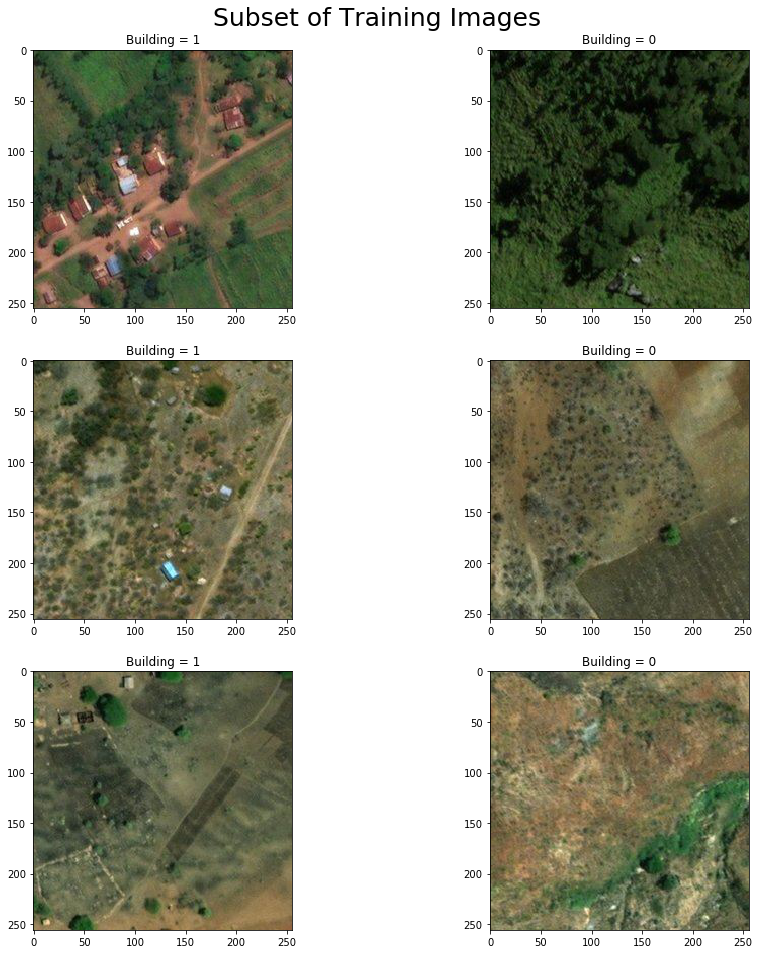

In [7]:
fig = plt.figure(figsize=(15,15))
for i in range(6):
    plt.subplot(3,2,i+1)
    plt.title('Building = %d'%y[i])
    plt.imshow(malawi_train_tensors[i])
fig.suptitle('Subset of Training Images', fontsize=25)
plt.subplots_adjust(top=.94)

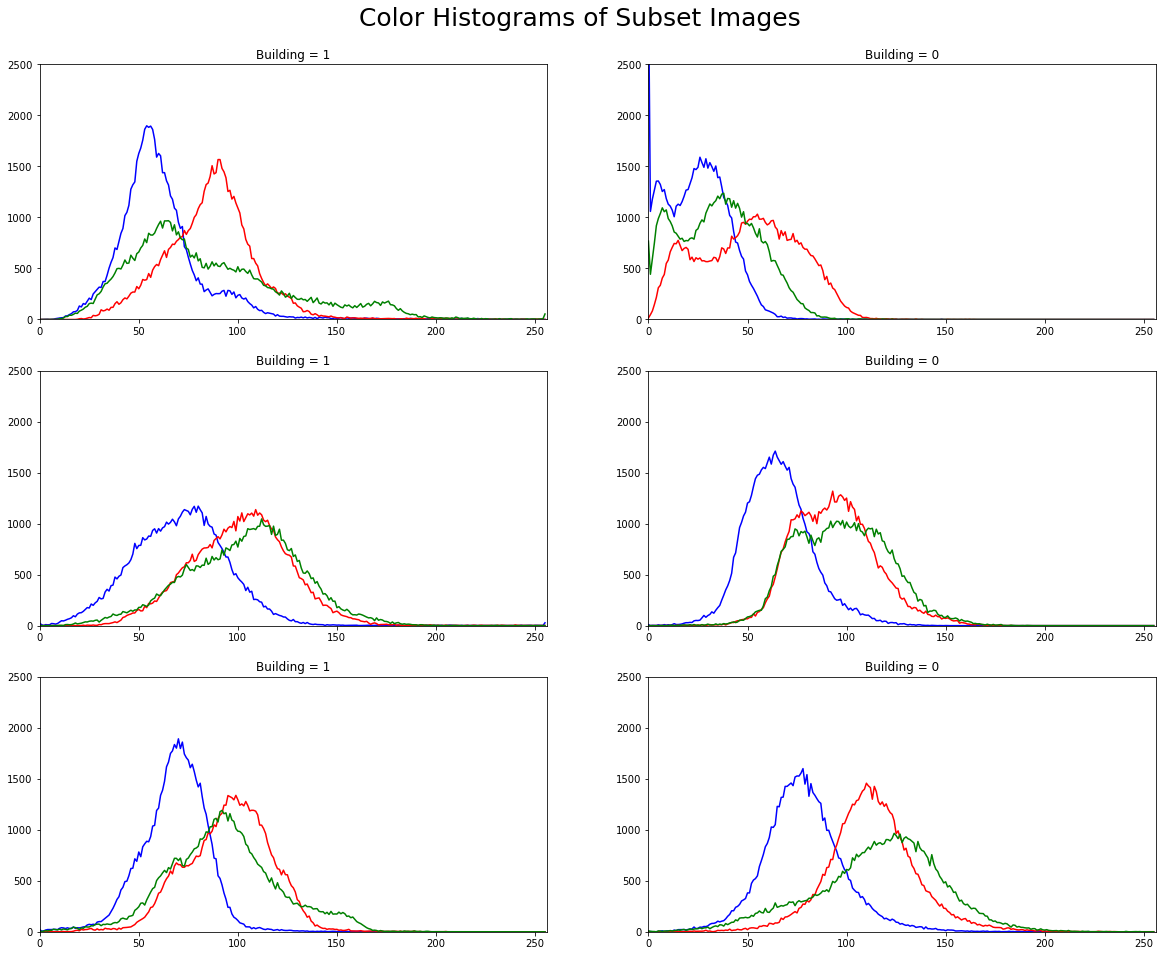

In [12]:
fig = plt.figure(figsize=(20,20))
color = ('b', 'r', 'g')
for i in range(6):
    plt.subplot(4,2,i+1)
    img = cv2.imread(malawi_train_files[i])
    plt.ylim(0, 2500)
    plt.title('Building = %d'%y[i])
    for i,col in enumerate(color):
        histr = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
fig.suptitle('Color Histograms of Subset Images', fontsize=25)
plt.subplots_adjust(top=.94)

#### Normalized color distribution summary statistics - Built

In [ ]:
print('red channel: min/mean/median/std/max = %.2f/%.2f/%.2f/%.2f'%(malawi_train_tensors[built,:,:,0].min(),
    malawi_train_tensors[built,:,:,0].mean(), malawi_train_tensors[built,:,:,0].std(), malawi_train_tensors[built,:,:,0].max()))
print('green channel: min/mean/median/std/max = %.2f/%.2f/%.2f/%.2f'%(malawi_train_tensors[built,:,:,1].min(),
    malawi_train_tensors[built,:,:,1].mean(), malawi_train_tensors[built,:,:,1].std(), malawi_train_tensors[built,:,:,1].max()))
print('blue channel: min/mean/median/std/max = %.2f/%.2f/%.2f/%.2f'%(malawi_train_tensors[built,:,:,2].min(),
    malawi_train_tensors[built,:,:,2].mean(), malawi_train_tensors[built,:,:,2].std(), malawi_train_tensors[built,:,:,2].max()))

#### Normalized color distribution summary statistics - Empty

In [ ]:
print('red channel: min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(malawi_train_tensors[empty,:,:,0].min(),
    malawi_train_tensors[empty,:,:,0].mean(), malawi_train_tensors[empty,:,:,0].std(), malawi_train_tensors[empty,:,:,0].max()))
print('green channel: min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(malawi_train_tensors[empty,:,:,1].min(),
    malawi_train_tensors[empty,:,:,1].mean(), malawi_train_tensors[empty,:,:,1].std(), malawi_train_tensors[empty,:,:,1].max()))
print('blue channel: min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(malawi_train_tensors[empty,:,:,2].min(),
    malawi_train_tensors[empty,:,:,2].mean(), malawi_train_tensors[empty,:,:,2].std(), malawi_train_tensors[empty,:,:,2].max()))

In [57]:
def convert_to_sobel(img_path):
    img_array = []
    for i in range(len(img_path)):
        img = cv2.imread(img_path[i], cv2.IMREAD_GRAYSCALE)
        img_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=7)
        img_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=7)
        img_sobel = img_x+img_y
        img_array.append(img_sobel)
    return img_array

In [58]:
sobel_train = convert_to_sobel(malawi_train_files)

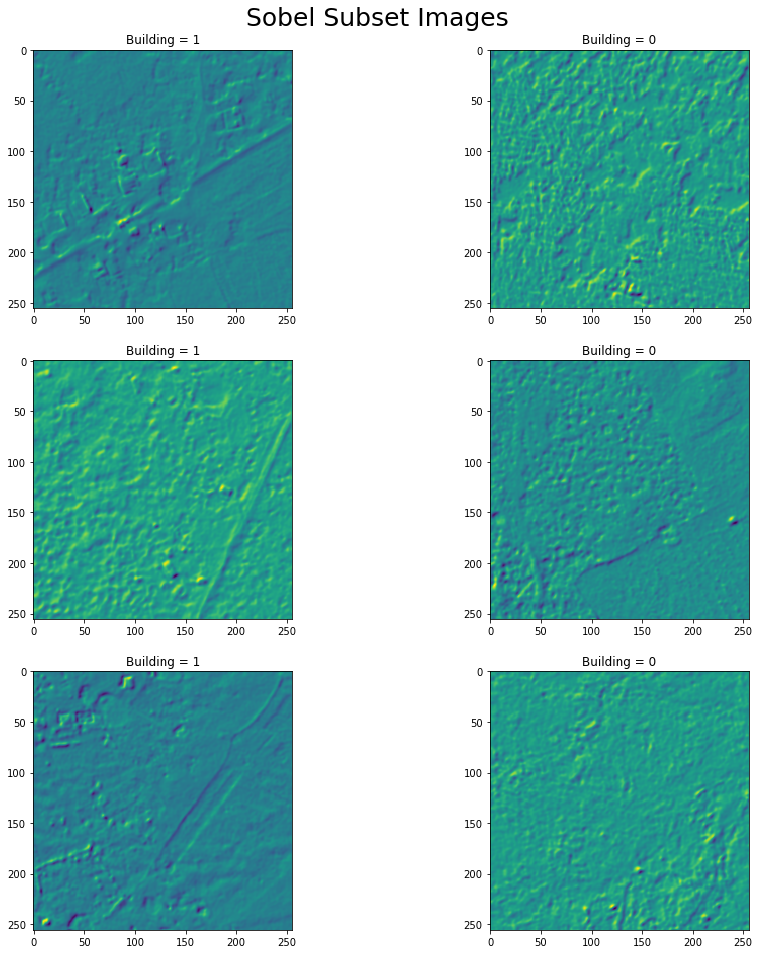

In [61]:
fig = plt.figure(figsize=(15,15))
for i in range(6):
    plt.subplot(3,2,i+1)
    plt.title('Building = %d'%y[i])
    plt.imshow(sobel_train[i])
fig.suptitle('Sobel Subset Images', fontsize=25)
plt.subplots_adjust(top=.94)

## Benchmark Model (random choice)

In [79]:
from sklearn import metrics
test_targets = pd.DataFrame(malawi_test_targets)
test_targets = pd.Series(test_targets[0])
malawi_test_targets_list = list(test_targets.astype(int))

In [104]:
random = pd.DataFrame(np.random.uniform(0,1, size=(1600,1)))
random[1] = 1-random[0]
random_series = random[0]
baseline_predictions_array = np.asarray(random)

In [107]:
threshold = 0.5
baseline_predictions_binary = (baseline_predictions_array < threshold).astype(np.int)
baseline_predictions_list = np.array(pd.DataFrame(baseline_predictions_binary)[0])

In [108]:
benchmark_acc = np.sum(np.array(baseline_predictions_list[0])==np.argmax(malawi_test_targets, axis=1))/len(baseline_predictions_list)
benchmark_logloss = metrics.log_loss(y_pred=baseline_predictions_array, y_true=malawi_test_targets)

In [113]:
print('Benchmark Accuracy Score is %s%%.' % round((100*benchmark_acc), 2))
print('Benchmark Log Loss is %s.' % benchmark_logloss)

Benchmark Accuracy Score is 50.75%.
Benchmark Log Loss is 1.0149829855.


## First Model

In [3]:
def plot_performance(history):
    plt.figure(figsize=(15,15))
    plt.subplot(211)  
    plt.plot(history.history['acc'])  
    plt.plot(history.history['val_acc'])  
    plt.title('model accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('epoch')  
    plt.legend(['train', 'test'], loc='upper left')  
    
    plt.subplot(212)  
    plt.plot(history.history['loss'])  
    plt.plot(history.history['val_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('epoch')  
    plt.legend(['train', 'test'], loc='upper left')  
    plt.show()

In [4]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Flatten, Dense, BatchNormalization, Activation
from keras.models import Sequential, Model
from keras.callbacks import ModelCheckpoint  
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics

In [10]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=malawi_train_tensors.shape[1:]))
model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))

model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.4))
model1.add(Dense(2, activation='softmax'))

model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 252, 252, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 122, 122, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 59, 59, 128)       73856     
__________

In [10]:
from keras.utils import plot_model
plot_model(model1, to_file='model2.png')

In [7]:
datagen_train = ImageDataGenerator(
    width_shift_range=0.2, 
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True)

datagen_valid = ImageDataGenerator(
    width_shift_range=0.2, 
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True) 

datagen_train.fit(malawi_train_tensors)
datagen_valid.fit(malawi_valid_tensors)

In [11]:
checkpointer = ModelCheckpoint(filepath='weights.best.model1.hdf5', 
                               verbose=1, save_best_only=True)

adam = optimizers.Adam(lr = 0.0001)
model1.compile(optimizer="adam",loss="binary_crossentropy",metrics =["accuracy"])

epochs=50
batch_size=32

In [ ]:
model1_history = model1.fit_generator(datagen_train.flow(malawi_train_tensors, malawi_train_targets, batch_size=batch_size), 
                    steps_per_epoch=malawi_train_tensors.shape[0] // batch_size,
                    epochs=epochs, verbose=1, callbacks=[checkpointer],
                    validation_data=datagen_valid.flow(malawi_valid_tensors, malawi_valid_targets, batch_size=batch_size),
                    validation_steps=malawi_valid_tensors.shape[0] // batch_size)

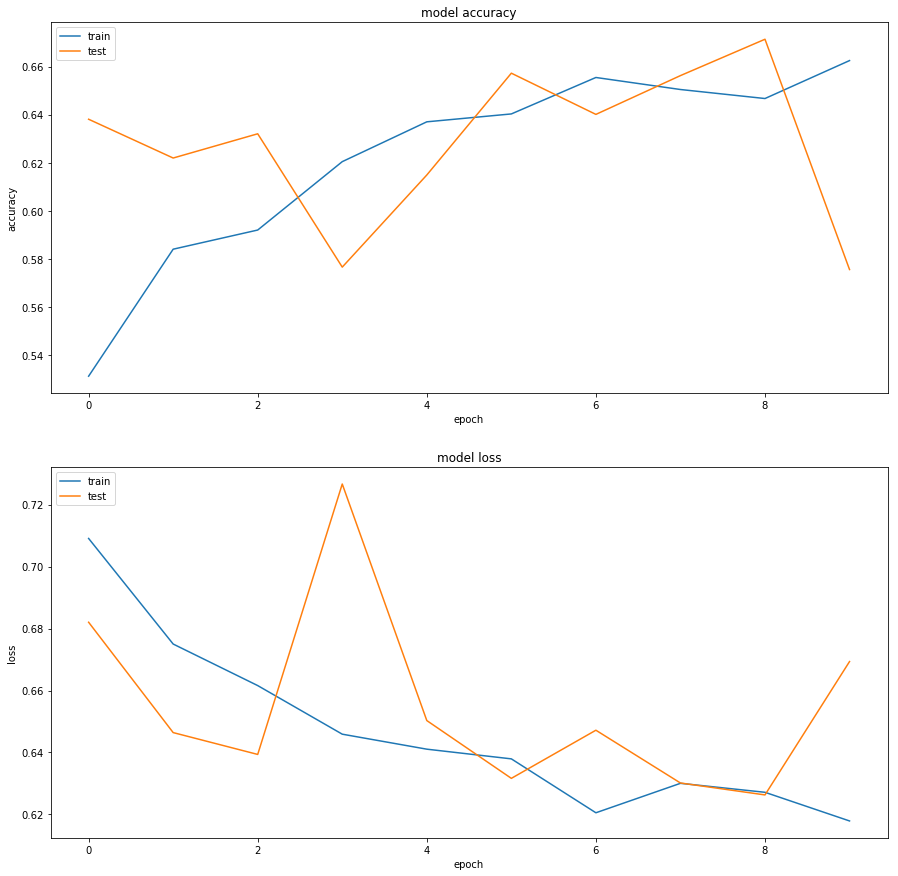

In [10]:
plot_performance(model1_history)

In [56]:
model1.load_weights('weights.best.model1.hdf5')

model1_predictions = [np.argmax(model1.predict(np.expand_dims(tensor, axis=0))) for tensor in malawi_test_tensors]
scratch_predictions = model1.predict(malawi_test_tensors)
test_accuracy = 100*np.sum(np.array(model1_predictions)==np.argmax(malawi_test_targets, axis=1))/len(model1_predictions)
log_loss = metrics.log_loss(y_pred=scratch_predictions, y_true=malawi_test_targets)
print('Test accuracy: %.4f%%' % test_accuracy)
print('Log loss: %.4f' % log_loss)

Test accuracy: 65.5000%
Log loss: 0.6275


## pretrain InceptionV3

In [13]:
from keras.applications import InceptionV3

In [7]:
inception_model = InceptionV3(include_top=False, weights='imagenet')

In [9]:
from keras.utils import plot_model
plot_model(inception_model, to_file='inception_model.png')

In [33]:
train = inception_model.predict(malawi_train_tensors)
valid = inception_model.predict(malawi_valid_tensors)
test = inception_model.predict(malawi_test_tensors)

In [34]:
np.savez(file='inception_features', 
         train=train, 
         valid=valid,
         test=test)

In [57]:
bottleneck_features = np.load('inception_features.npz')
inception_train = bottleneck_features['train']
inception_valid = bottleneck_features['valid']
inception_test = bottleneck_features['test']

In [16]:
inception_train.shape

(6400, 6, 6, 2048)

In [64]:
inception_model = Sequential()
inception_model.add(GlobalAveragePooling2D(input_shape=inception_train.shape[1:]))
inception_model.add(Dropout(0.2))
inception_model.add(Dense(2, activation='softmax'))

inception_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 4098      
Total params: 4,098
Trainable params: 4,098
Non-trainable params: 0
_________________________________________________________________


In [10]:
from keras.utils import plot_model
plot_model(inception_model, to_file='inception_model.png')

In [65]:
adagrad = optimizers.Adagrad(lr = 0.001)
inception_model.compile(loss = "binary_crossentropy", 
                    optimizer = adagrad, 
                    metrics=["accuracy"])

epochs=200
batch_size=156

In [66]:
### TODO: Train the model.
checkpointer = ModelCheckpoint(filepath='weights.best.inception.hdf5', 
                               verbose=1, save_best_only=True)

inception_history = inception_model.fit(inception_train, malawi_train_targets, 
          validation_data=(inception_valid, malawi_valid_targets),
          epochs=epochs, batch_size=batch_size, callbacks=[checkpointer], verbose=1)

Train on 6400 samples, validate on 1000 samples
Epoch 1/200
6400/6400 [==============================] - 1s 182us/step - loss: 0.6672 - acc: 0.6136 - val_loss: 0.6201 - val_acc: 0.6440
Epoch 2/200
6400/6400 [==============================] - 1s 164us/step - loss: 0.5944 - acc: 0.6836 - val_loss: 0.5733 - val_acc: 0.7130
Epoch 3/200
6400/6400 [==============================] - 1s 164us/step - loss: 0.5825 - acc: 0.6894 - val_loss: 0.5591 - val_acc: 0.7210
Epoch 4/200
6400/6400 [==============================] - 1s 164us/step - loss: 0.5647 - acc: 0.7133 - val_loss: 0.5487 - val_acc: 0.7180
Epoch 5/200
6400/6400 [==============================] - 1s 164us/step - loss: 0.5649 - acc: 0.7072 - val_loss: 0.5391 - val_acc: 0.7320
Epoch 6/200
6400/6400 [==============================] - 1s 165us/step - loss: 0.5512 - acc: 0.7267 - val_loss: 0.5345 - val_acc: 0.7400
Epoch 7/200
6400/6400 [==============================] - 1s 164us/step - loss: 0.5525 - acc: 0.7220 - val_loss: 0.5326 - val_acc: 

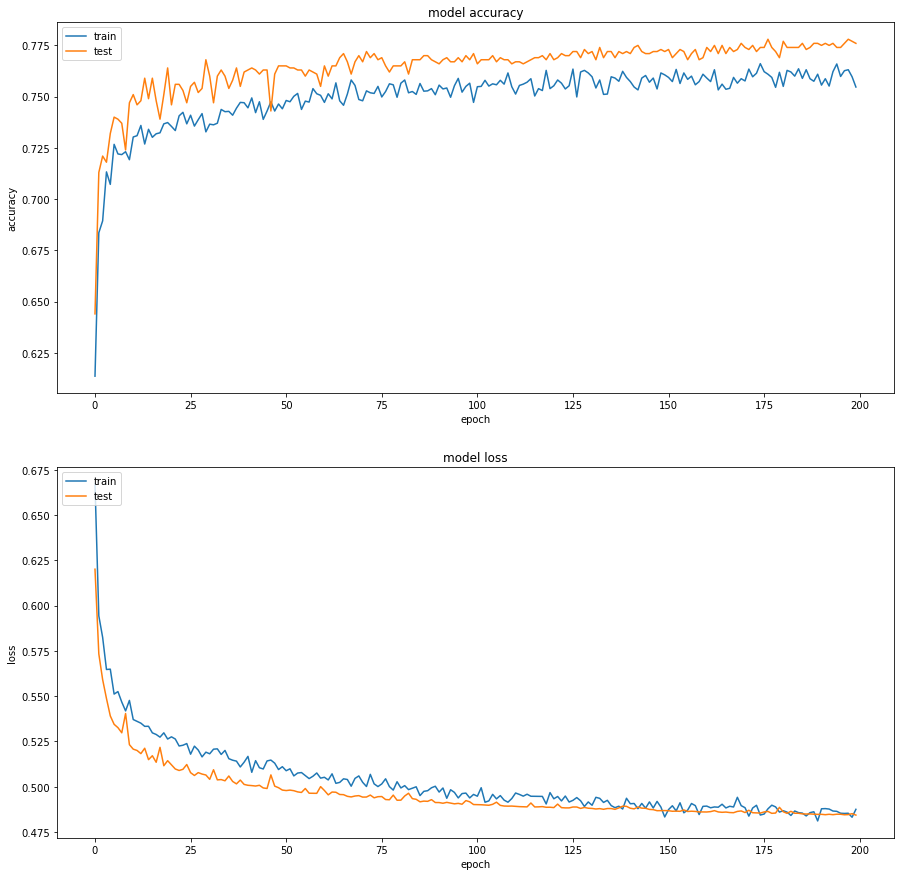

In [67]:
plot_performance(inception_history)

In [68]:
inception_model.load_weights('weights.best.inception.hdf5')

malawi_inception_predictions = [np.argmax(inception_model.predict(np.expand_dims(tensor, axis=0))) for tensor in inception_test]
inception_predictions = inception_model.predict(inception_test)
test_accuracy = 100*np.sum(np.array(malawi_inception_predictions)==np.argmax(malawi_test_targets, axis=1))/len(malawi_inception_predictions)
log_loss = metrics.log_loss(y_pred=inception_predictions, y_true=malawi_test_targets)

print('Test accuracy: %.4f%%' % test_accuracy)
print('Log loss: %.4f' % log_loss)

Test accuracy: 74.0625%
Log loss: 0.5145


## pretrain VGG-16

In [22]:
from keras.applications import VGG16

In [12]:
base_model = VGG16(include_top=False, weights='imagenet')

In [13]:
from keras.utils import plot_model
plot_model(model1, to_file='vgg16_model.png')

In [71]:
train = base_model.predict(malawi_train_tensors)
valid = base_model.predict(malawi_valid_tensors)
test = base_model.predict(malawi_test_tensors)

In [72]:
np.savez(file='vgg16_features', 
         train=train, 
         valid=valid,
         test=test)

In [6]:
bottleneck_features = np.load('vgg16_features.npz')
train_vgg16 = bottleneck_features['train']
valid_vgg16 = bottleneck_features['valid']
test_vgg16 = bottleneck_features['test']

In [24]:
train_vgg16.shape

(6400, 8, 8, 512)

In [7]:
vgg16_model = Sequential()
vgg16_model.add(GlobalAveragePooling2D(input_shape=train_vgg16.shape[1:]))
vgg16_model.add(Dropout(0.2))
vgg16_model.add(Dense(2, activation='softmax'))

vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1026      
Total params: 1,026
Trainable params: 1,026
Non-trainable params: 0
_________________________________________________________________


In [75]:
rmsprop = optimizers.RMSprop(lr = 0.001)
vgg16_model.compile(loss = "binary_crossentropy", 
                    optimizer = rmsprop, 
                    metrics=["accuracy"])

epochs=200
batch_size=126

In [76]:
### TODO: Train the model.
checkpointer = ModelCheckpoint(filepath='weights.best.vgg16.hdf5', 
                               verbose=1, save_best_only=True)

vgg16_history = vgg16_model.fit(train_vgg16, malawi_train_targets, 
          validation_data=(valid_vgg16, malawi_valid_targets),
          epochs=epochs, batch_size=batch_size, callbacks=[checkpointer], verbose=1)

Train on 6400 samples, validate on 1000 samples
Epoch 1/200
6400/6400 [==============================] - 1s 87us/step - loss: 0.6279 - acc: 0.6473 - val_loss: 0.5712 - val_acc: 0.7360
Epoch 2/200
6400/6400 [==============================] - 0s 65us/step - loss: 0.5662 - acc: 0.7184 - val_loss: 0.5366 - val_acc: 0.7430
Epoch 3/200
6400/6400 [==============================] - 0s 65us/step - loss: 0.5359 - acc: 0.7411 - val_loss: 0.5217 - val_acc: 0.7510
Epoch 4/200
6400/6400 [==============================] - 0s 62us/step - loss: 0.5273 - acc: 0.7470 - val_loss: 0.5146 - val_acc: 0.7520
Epoch 5/200
6400/6400 [==============================] - 0s 64us/step - loss: 0.5187 - acc: 0.7486 - val_loss: 0.5097 - val_acc: 0.7530
Epoch 6/200
6400/6400 [==============================] - 0s 64us/step - loss: 0.5166 - acc: 0.7517 - val_loss: 0.5070 - val_acc: 0.7550
Epoch 7/200
6400/6400 [==============================] - 0s 62us/step - loss: 0.5113 - acc: 0.7533 - val_loss: 0.5076 - val_acc: 0.7490


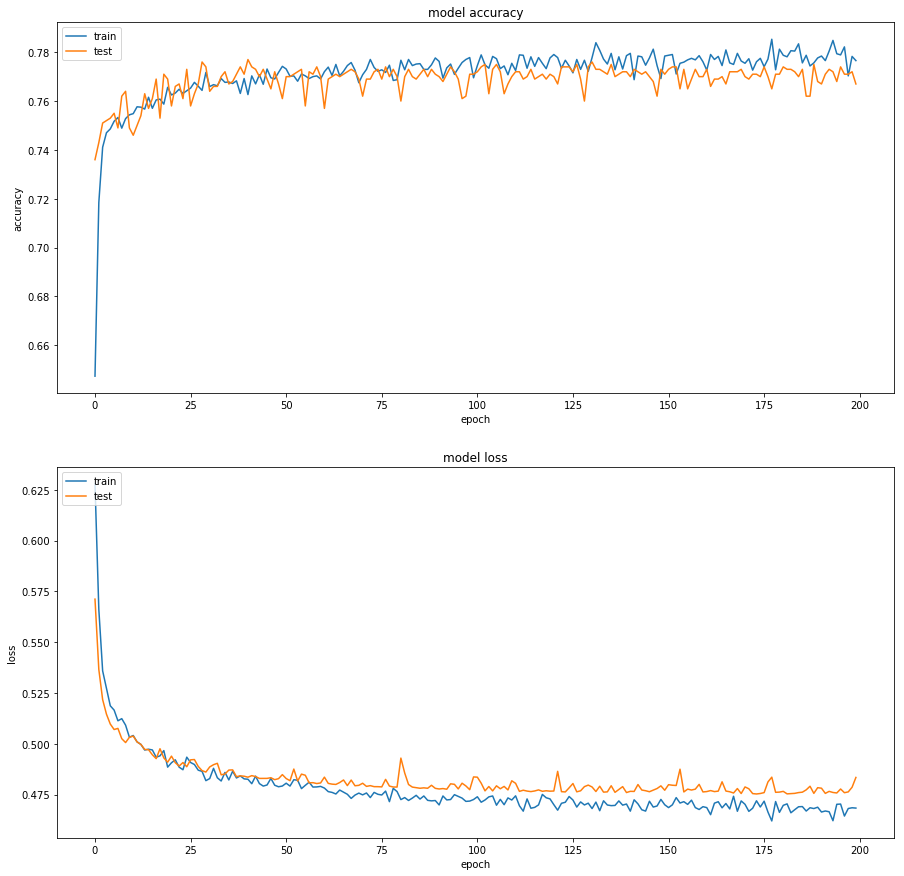

In [77]:
plot_performance(vgg16_history)

In [8]:
vgg16_model.load_weights('weights.best.vgg16.hdf5')

malawi_vgg16_predictions = [np.argmax(vgg16_model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_vgg16]
vgg16_predictions = vgg16_model.predict(test_vgg16)
test_accuracy = 100*np.sum(np.array(malawi_vgg16_predictions)==np.argmax(malawi_test_targets, axis=1))/len(malawi_vgg16_predictions)
log_loss = metrics.log_loss(y_pred=vgg16_predictions, y_true=malawi_test_targets)

print('Test accuracy: %.4f%%' % test_accuracy)
print('Log loss: %.4f' % log_loss)

Test accuracy: 75.6250%
Log loss: 0.5064


In [87]:
np.argmax(malawi_test_targets, axis=1)

array([0, 1, 0, ..., 0, 1, 1])

In [ ]:
threshold = 0.5
baseline_predictions_binary = (baseline_predictions_array < threshold).astype(np.int)
baseline_predictions_list = np.array(pd.DataFrame(baseline_predictions_binary)[0])

In [107]:
malawi_vgg16_predictions = (vgg16_model.predict(test_vgg16) > 0.5).astype(np.int)
malawi_vgg16_predictions = np.array(pd.DataFrame(malawi_vgg16_predictions)[0])

array([1, 0, 0, ..., 1, 0, 0])

In [112]:
malawi_test_array = np.array(pd.DataFrame(malawi_test_targets)[0]).astype(np.int)

array([1, 0, 1, ..., 1, 0, 0])

In [113]:
vgg16_results = malawi_test_array == malawi_vgg16_predictions
vgg16_incorrect = np.where(vgg16_results==False)[0]
vgg16_incorrect_sample = np.random.choice(vgg16_incorrect,size=5)

In [118]:
vgg16_matrix = metrics.confusion_matrix(y_true=malawi_test_array, y_pred=malawi_vgg16_predictions)
tn, fp, fn, tp = metrics.confusion_matrix(y_true=malawi_test_array, y_pred=malawi_vgg16_predictions).ravel()
vgg16_matrix

array([[686, 126],
       [264, 524]])

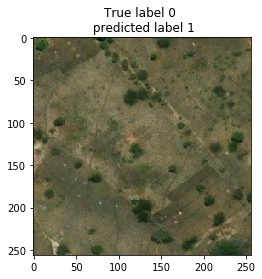

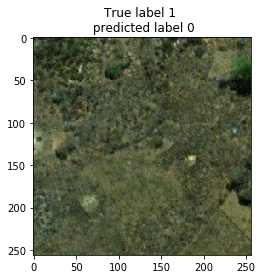

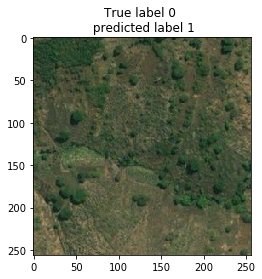

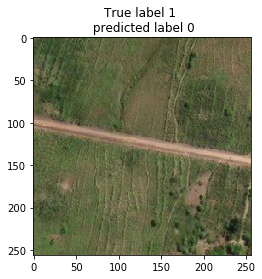

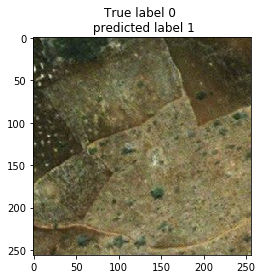

In [115]:
for i,sample in enumerate(vgg16_incorrect_sample):
    img = image.load_img(malawi_test_files[sample],target_size = (256,256))
    fig = plt.figure()
    plt.title("True label {} \n predicted label {}".format(malawi_test_array[sample],malawi_vgg16_predictions[sample]))
    plt.imshow(img)